In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Embedding,Flatten,Dropout
from tensorflow.keras.utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
text_dataframe=pd.read_csv("/content/drive/MyDrive/Projects/Summer Internship (3rd Yr)/text_emotions.txt",sep=';')
text_dataframe.columns=['Text','Emotions']
text_dataframe.head()

,Text,Emotions
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [4]:
text_dataframe.shape

(17999, 2)

In [5]:
text_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      17999 non-null  object
 1   Emotions  17999 non-null  object
dtypes: object(2)
memory usage: 281.4+ KB


In [6]:
text_dataframe.isna().sum()

,0
Text,0
Emotions,0


In [7]:
text_dataframe.duplicated().sum()

1

In [8]:
index=text_dataframe[text_dataframe.duplicated()==True].index
text_dataframe.drop(index,axis=0,inplace=True)
text_dataframe.reset_index(inplace=True,drop=True)

In [9]:
text_dataframe.shape

(17998, 2)

In [10]:
text_dataframe[text_dataframe['Text'].duplicated()==True]

,Text,Emotions
5066,i feel on the verge of tears from weariness i ...,joy
6132,i still feel a craving for sweet food,love
6562,i tend to stop breathing when i m feeling stre...,anger
7622,i was intensely conscious of how much cash i h...,sadness
7684,im still not sure why reilly feels the need to...,surprise
8245,i am not amazing or great at photography but i...,love
9595,ive also made it with both sugar measurements ...,joy
9686,i had to choose the sleek and smoother feel of...,joy
9768,i often find myself feeling assaulted by a mul...,sadness
9785,i feel im being generous with that statement,joy


In [11]:
index=text_dataframe[text_dataframe['Text'].duplicated()==True].index
text_dataframe.drop(index,axis=0,inplace=True)
text_dataframe.reset_index(inplace=True,drop=True)

In [12]:
text_dataframe.shape

(17961, 2)

In [13]:
text_data=text_dataframe['Text'].to_list()
labels=text_dataframe['Emotions'].to_list()

In [14]:
l1=text_dataframe['Emotions'].to_list()
l2=set(l1)

In [15]:
#{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}
label_mapping = {
    0: "anger",
    1: "fear",
    2: "joy",
    3: "love",
    4: "sadness",
    5: "surprise"
}

In [16]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(text_data)
print(len(tokenizer.word_index))
token_list=tokenizer.texts_to_sequences(text_data)
print(len(token_list))

16196
17961


In [17]:
max_sequence_length=max([len(seq) for seq in token_list])

In [18]:
padded_sequences=pad_sequences(token_list,maxlen=max_sequence_length,padding='pre',truncating='pre')

In [19]:
label_encoder=LabelEncoder()
labels=label_encoder.fit_transform(labels)

In [20]:
one_hot_labels= tf.keras.utils.to_categorical(labels)
one_hot_labels.shape

(17961, 6)

In [21]:
X_train,X_val,y_train,y_val=train_test_split(padded_sequences,one_hot_labels,test_size=0.3)

In [22]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=256, input_shape=(max_sequence_length,)))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=128,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dropout(0.3))
model.add(Dense(units=one_hot_labels.shape[-1], activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 66, 256)             │       4,146,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 66, 512)             │       1,050,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 66, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 66, 256)             │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 66, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,249,222 (23.84 MB)

 Trainable params: 6,249,222 (23.84 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train, y_train, batch_size=256, epochs=10, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.3173 - loss: 1.6148 - val_accuracy: 0.4801 - val_loss: 1.4068
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.5734 - loss: 1.1341 - val_accuracy: 0.7178 - val_loss: 0.7388
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.8126 - loss: 0.4725 - val_accuracy: 0.8504 - val_loss: 0.4523
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9291 - loss: 0.2247 - val_accuracy: 0.8721 - val_loss: 0.4042
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9631 - loss: 0.1161 - val_accuracy: 0.8874 - val_loss: 0.3925
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9709 - loss: 0.0904 - val_accuracy: 0.8833 - val_loss: 0.4045
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9814 - loss: 0.0605 - val_accuracy: 0.8848 - val_loss: 0.4353
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9802 - loss: 0.0613 - val_accuracy: 

In [24]:
model.save("text_emotions_keras_88.etc%.keras")

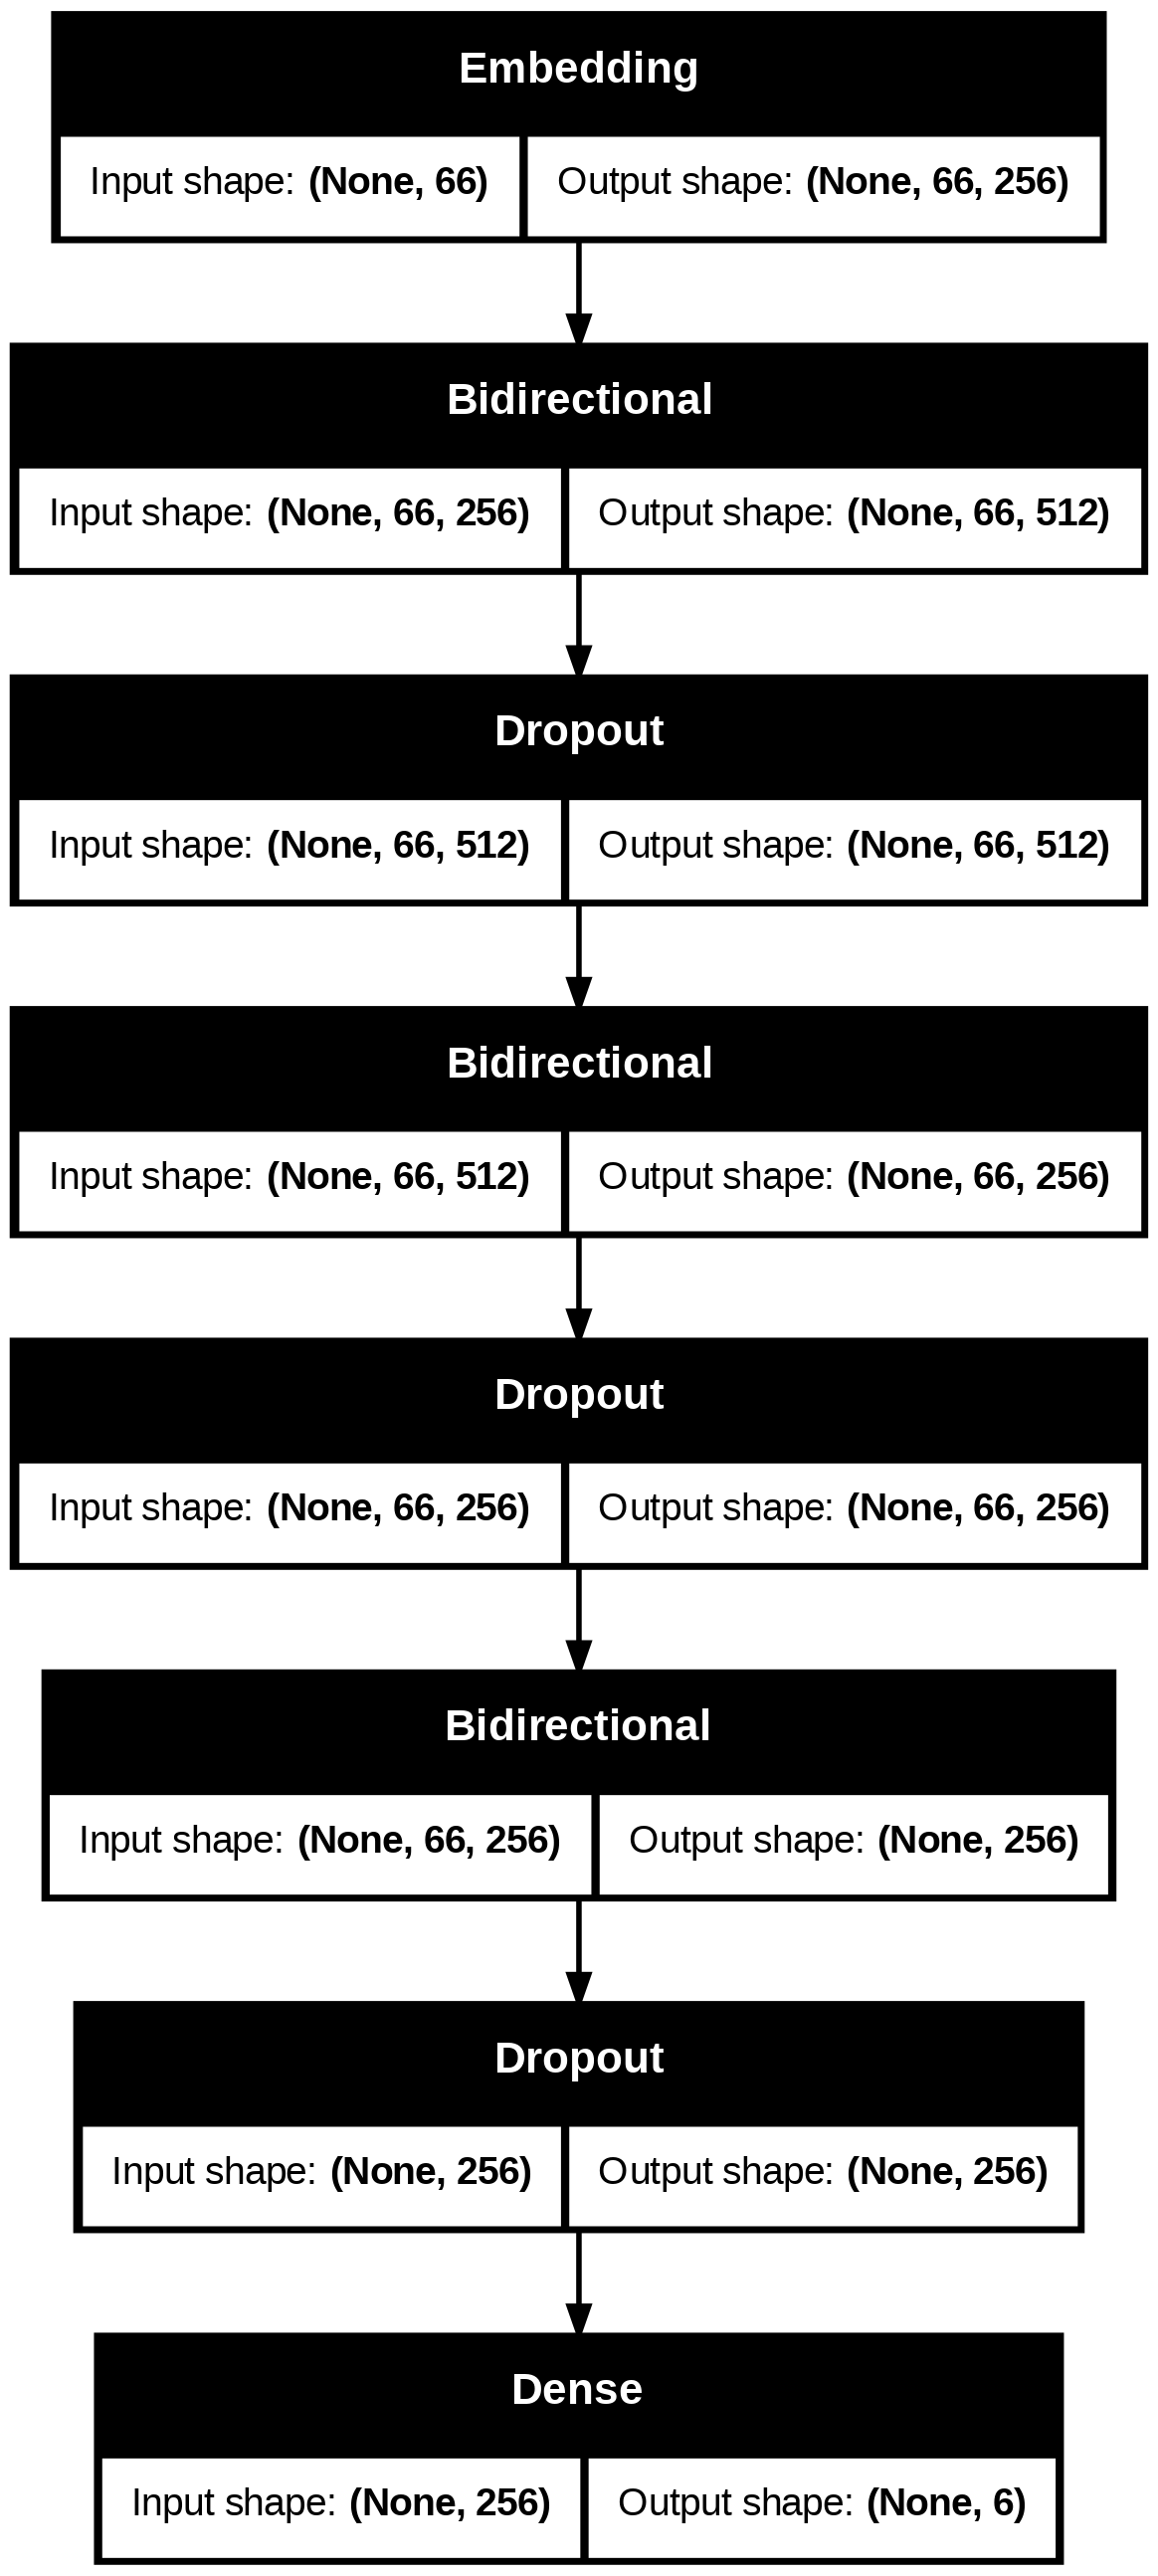

In [25]:
plot_model(model, show_shapes=True,)

In [26]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Tokenizer saved successfully.")
with open('model.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Model saved successfully.")

Tokenizer saved successfully.
Model saved successfully.


In [27]:
def final_prediction_model(text):
  sentence=tokenizer.texts_to_sequences([text])
  padded_sentence=pad_sequences(sentence,maxlen=max_sequence_length,padding='pre')
  prediction=model.predict(padded_sentence)
  predicted_label=label_mapping[np.argmax(prediction)]
  return predicted_label

In [28]:
import random
random_input_index=random.randint(12572,len(text_data)-1)
random_input_text=text_data[random_input_index]
emotion_detected=final_prediction_model(random_input_text)
print(random_input_index)
print(random_input_text)
print(emotion_detected)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
13685
i like to use pineapple grapes watermelon and berries add some fresh chopped mint for a cool refreshing flavor and if youre feeling festive you can even add a little liqueur like coconut rum or drambuie
joy


In [29]:
!pip install gtts
from gtts import gTTS
def text_to_speech(text,file_name):
    tts = gTTS(text=text, lang='en')
    tts.save(file_name)
    return file_name

In [30]:
import IPython.display as ipd
input_audio_file=text_to_speech(random_input_text,"random_input_audio.wav")
ipd.Audio(input_audio_file)

In [31]:
output_audio_file=text_to_speech(emotion_detected,"output_audio.wav")
ipd.Audio(output_audio_file)

In [32]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=bcefabf4af577c1450d0c60b392719106e73f6d24e2f642796b5f6e1bbd349df
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:

In [33]:
from googletrans import Translator

def translate_text(text, source_lang='en', target_lang='hi'):
    translator = Translator()
    translated = translator.translate(text, src=source_lang, dest=target_lang)
    print(f"Original text: {text}")
    print(f"Translated text: {translated.text}")

    return translated.text

In [39]:
translated_input_text = translate_text(random_input_text)

Original text: i like to use pineapple grapes watermelon and berries add some fresh chopped mint for a cool refreshing flavor and if youre feeling festive you can even add a little liqueur like coconut rum or drambuie
Translated text: मुझे अनानास अंगूर के तरबूज का उपयोग करना पसंद है और जामुन एक शांत ताज़ा स्वाद के लिए कुछ ताजा कटा हुआ पुदीना जोड़ते हैं और अगर आप उत्सव महसूस करते हैं


In [40]:
translated_output_text=translate_text(emotion_detected)

Original text: joy
Translated text: आनंद
